In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = r"E:\iiser_project\result_broad_filtered_for_python.xls"
excel_data = pd.ExcelFile(file_path)

# Define the sheet names you want to load
sheets_to_load = ["wwtr1_metadata", "yap1_metadata"]

# Iterate through the specified sheets
for sheet_name in sheets_to_load:
    # Load each sheet into a DataFrame
    df = excel_data.parse(sheet_name)

    # Standardize column names by stripping extra spaces
    df.columns = df.columns.str.strip()
    
    # Extract only the Barcode and celltype_major columns
    if "Barcode" in df.columns and "celltype_major" in df.columns:
        selected_columns = df[["Barcode", "celltype_major","origidentity"]]
        print(f"Sheet: {sheet_name}")
        print(selected_columns.head(10))
    else:
        print(f"Sheet: {sheet_name} does not contain the required columns.")


Sheet: wwtr1_metadata
                    Barcode celltype_major origidentity
0  CID3586_GGAATAACACGGCCAT    Endothelial      CID3586
1  CID3586_GCGCAGTTCTTTAGGG    Endothelial      CID3586
2  CID3586_GCGCAACGTCTGCGGT    Endothelial      CID3586
3  CID3586_ATGGGAGAGGAGCGAG    Endothelial      CID3586
4  CID3586_TTTACTGTCTGAGTGT    Endothelial      CID3586
5  CID3586_ACTGAGTGTTGAGGTG    Endothelial      CID3586
6  CID3586_CAGCGACGTCGAGATG    Endothelial      CID3586
7  CID3586_CTCTAATGTCCCGACA    Endothelial      CID3586
8  CID3586_GAAACTCAGATATACG    Endothelial      CID3586
9  CID3586_GAACCTATCCTATTCA    Endothelial      CID3586
Sheet: yap1_metadata
                    Barcode     celltype_major origidentity
0  CID3586_GGAATAACACGGCCAT               CAFs      CID3586
1  CID3586_GCGCAGTTCTTTAGGG               CAFs      CID3586
2  CID3586_GCGCAACGTCTGCGGT  Normal Epithelial      CID3586
3  CID3586_CCCATACGTCATCCCT               CAFs      CID3586
4  CID3586_CTTAGGATCCATGAGT  Normal Epith

In [6]:
# Table for yap1_metadata
df_yap = excel_data.parse("yap1_metadata")
df_yap.columns = df_yap.columns.str.strip()
yap_counts = df_yap.groupby("origidentity")["celltype_major"].value_counts().reset_index(name="Counts")

# Table for wwtr1_metadata
df_wwtr1 = excel_data.parse("wwtr1_metadata")
df_wwtr1.columns = df_wwtr1.columns.str.strip()
wwtr1_counts = df_wwtr1.groupby("origidentity")["celltype_major"].value_counts().reset_index(name="Counts")

# Save to an Excel file
output_file_path = r"E:\iiser_project\celltype_counts.xlsx"
with pd.ExcelWriter(output_file_path) as writer:
    yap_counts.to_excel(writer, sheet_name="yap1_metadata_counts", index=False)
    wwtr1_counts.to_excel(writer, sheet_name="wwtr1_metadata_counts", index=False)

print(f"Counts saved to {output_file_path}")


Counts saved to E:\iiser_project\celltype_counts.xlsx


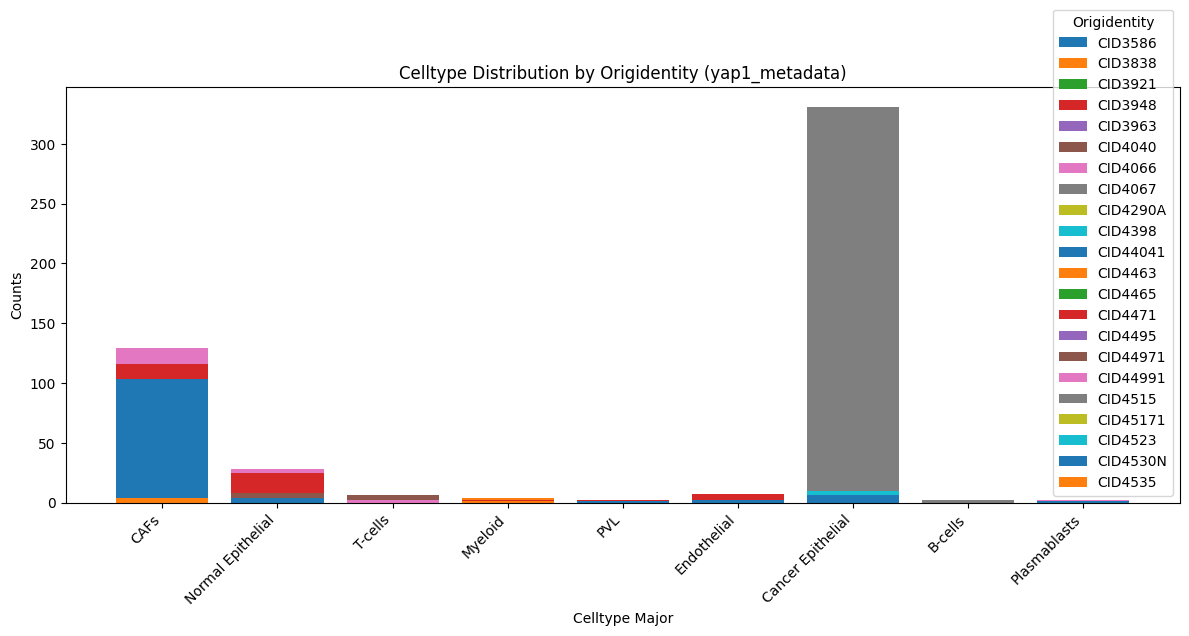

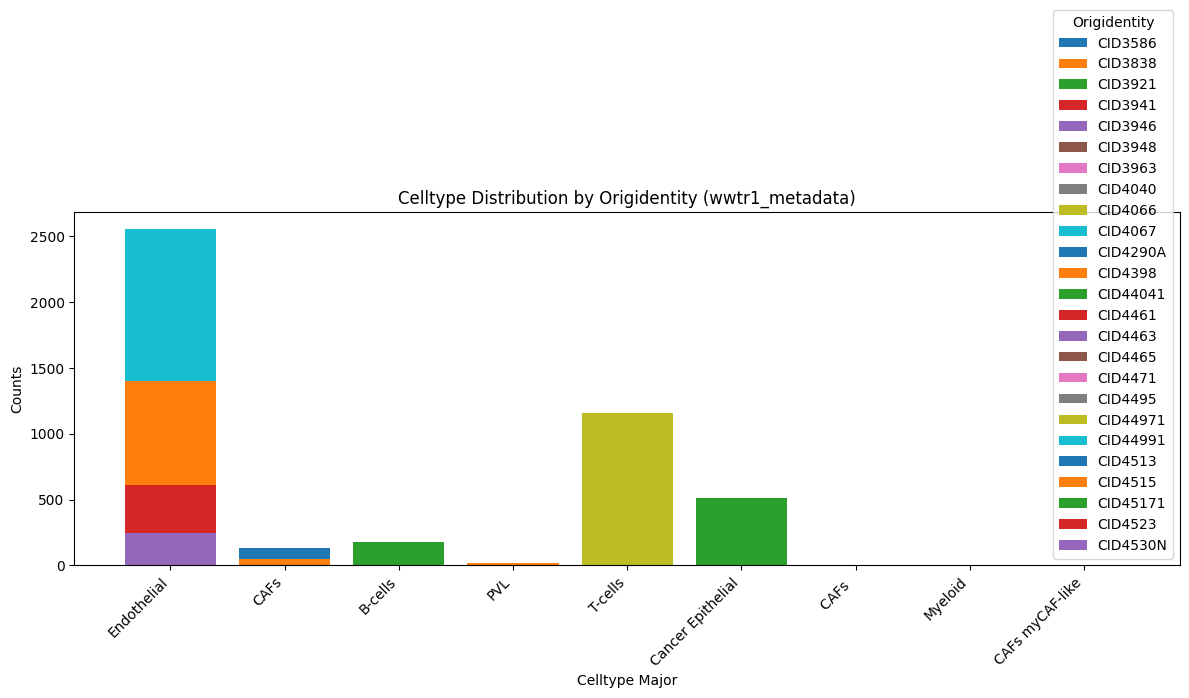

In [7]:
import matplotlib.pyplot as plt

# Plot for yap1_metadata
plt.figure(figsize=(12, 6))
for origidentity in yap_counts["origidentity"].unique():
    subset = yap_counts[yap_counts["origidentity"] == origidentity]
    plt.bar(subset["celltype_major"], subset["Counts"], label=origidentity)

plt.title("Celltype Distribution by Origidentity (yap1_metadata)")
plt.xlabel("Celltype Major")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Origidentity")
plt.tight_layout()
plt.savefig(r"E:\iiser_project\yap1_metadata_counts_plot.png")
plt.show()

# Plot for wwtr1_metadata
plt.figure(figsize=(12, 6))
for origidentity in wwtr1_counts["origidentity"].unique():
    subset = wwtr1_counts[wwtr1_counts["origidentity"] == origidentity]
    plt.bar(subset["celltype_major"], subset["Counts"], label=origidentity)

plt.title("Celltype Distribution by Origidentity (wwtr1_metadata)")
plt.xlabel("Celltype Major")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Origidentity")
plt.tight_layout()
plt.savefig(r"E:\iiser_project\wwtr1_metadata_counts_plot.png")
plt.show()


In [13]:
# Extract the necessary columns from each dataset
wwtr1_selected = df_wwtr1[["Barcode", "celltype_major", "origidentity"]]
yap_selected = df_yap[["Barcode", "celltype_major", "origidentity"]]

# Find common Barcodes and merge datasets with origidentity
common_barcodes = pd.merge(
    wwtr1_selected, yap_selected, on="Barcode", suffixes=("_wwtr1", "_yap")
)

# Filter rows where celltype_major differs between wwtr1 and yap
differing_celltypes = common_barcodes[
    common_barcodes["celltype_major_wwtr1"] != common_barcodes["celltype_major_yap"]
]

# Count occurrences of each celltype_major combination for differing cell types
differing_celltype_counts = differing_celltypes.groupby(
    ["origidentity_wwtr1", "origidentity_yap", "celltype_major_wwtr1", "celltype_major_yap"]
).size().reset_index(name="Counts")

# Save the result to an Excel file
output_file_path = r"E:\iiser_project\differing_celltype_counts.xlsx"
differing_celltype_counts.to_excel(output_file_path, index=False)
print(f"Differing cell type counts saved to '{output_file_path}'")

# Display the result
print(differing_celltype_counts)


Differing cell type counts saved to 'E:\iiser_project\differing_celltype_counts.xlsx'
   origidentity_wwtr1 origidentity_yap celltype_major_wwtr1  \
0             CID3586          CID3586          Endothelial   
1             CID3586          CID3586          Endothelial   
2             CID3838          CID3838                 CAFs   
3             CID3948          CID3948          Endothelial   
4             CID4040          CID4040          Endothelial   
5             CID4040          CID4040          Endothelial   
6             CID4066          CID4066              T-cells   
7             CID4066          CID4066              T-cells   
8             CID4066          CID4066              T-cells   
9             CID4067          CID4067          Endothelial   
10           CID4290A         CID4290A          Endothelial   
11            CID4398          CID4398          Endothelial   
12           CID44041         CID44041          Endothelial   
13            CID4463          C

In [14]:
# Extract necessary columns from each dataset
wwtr1_selected = df_wwtr1[["origidentity", "celltype_major"]]
yap_selected = df_yap[["origidentity", "celltype_major"]]

# Combine the two datasets into one
combined_data = pd.concat([wwtr1_selected, yap_selected], ignore_index=True)

# Group by origidentity and find unique celltype_major for each
unique_celltypes_per_patient = combined_data.groupby("origidentity")["celltype_major"].nunique().reset_index(name="Unique_Celltypes")

# Filter to identify patients with more than one unique cell type
patients_with_multiple_celltypes = unique_celltypes_per_patient[unique_celltypes_per_patient["Unique_Celltypes"] > 1]

# Count the occurrences of each celltype_major per origidentity
celltype_counts = combined_data.groupby(["origidentity", "celltype_major"]).size().reset_index(name="Counts")

# Merge to get detailed information for patients with multiple cell types
detailed_info = pd.merge(patients_with_multiple_celltypes, celltype_counts, on="origidentity", how="inner")

# Save results to an Excel file
output_file_path = r"E:\iiser_project\patients_with_multiple_celltypes.xlsx"
detailed_info.to_excel(output_file_path, index=False)
print(f"Results saved to '{output_file_path}'")

# Display the result
print(detailed_info)


Results saved to 'E:\iiser_project\patients_with_multiple_celltypes.xlsx'
   origidentity  Unique_Celltypes     celltype_major  Counts
0       CID3586                 3               CAFs     139
1       CID3586                 3        Endothelial     147
2       CID3586                 3  Normal Epithelial       2
3       CID3838                 6            B-cells     145
4       CID3838                 6               CAFs      86
..          ...               ...                ...     ...
84     CID4530N                 6  Normal Epithelial       4
85     CID4530N                 6                PVL       1
86     CID4530N                 6       Plasmablasts       1
87      CID4535                 2               CAFs       4
88      CID4535                 2            Myeloid       1

[89 rows x 4 columns]


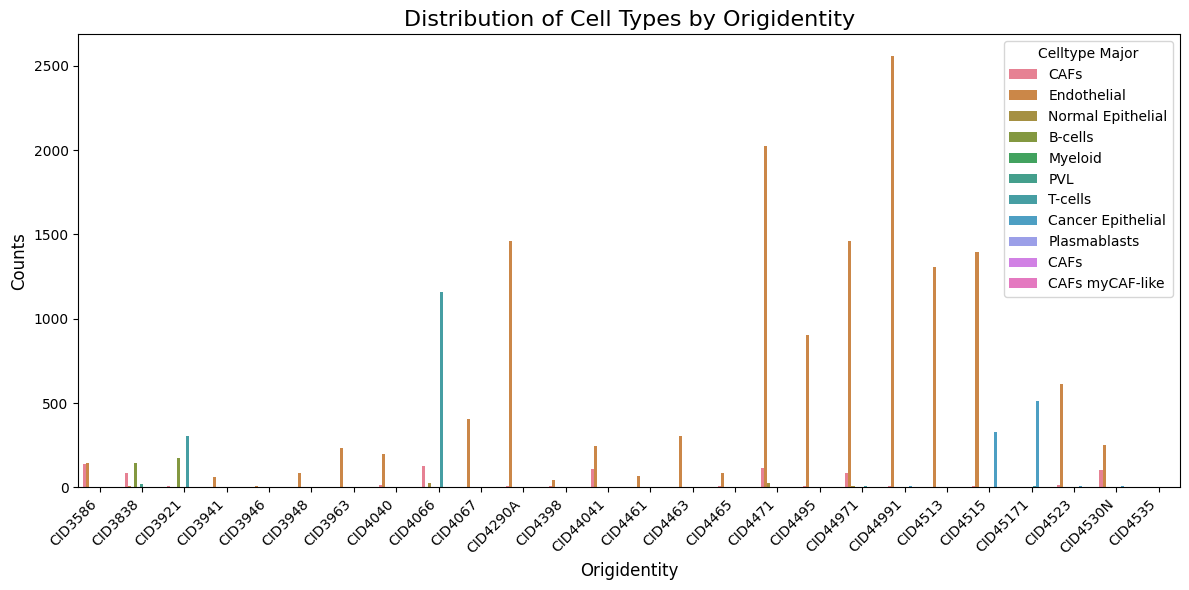

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each celltype_major per origidentity
celltype_counts = combined_data.groupby(["origidentity", "celltype_major"]).size().reset_index(name="Counts")

# Set up the plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=celltype_counts,
    x="origidentity",
    y="Counts",
    hue="celltype_major",
    dodge=True
)

# Customize the plot
plt.title("Distribution of Cell Types by Origidentity", fontsize=16)
plt.xlabel("Origidentity", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Celltype Major", fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


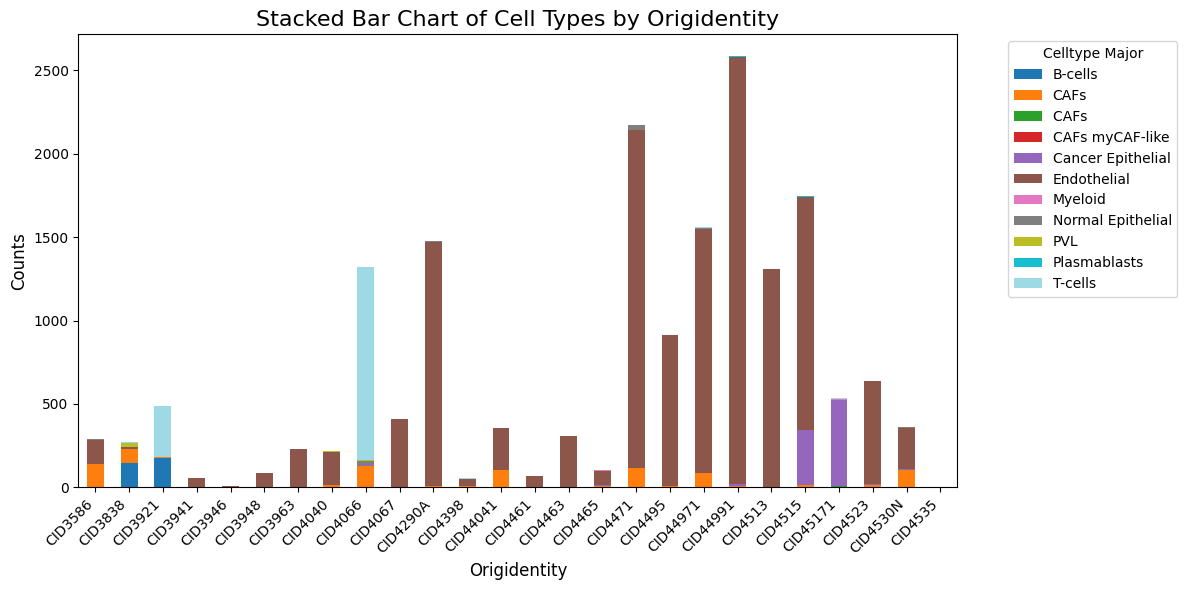

In [16]:
# Pivot the data to make it suitable for a stacked bar chart
pivot_data = celltype_counts.pivot(index="origidentity", columns="celltype_major", values="Counts").fillna(0)

# Set up the plot
pivot_data.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="tab20"
)

# Customize the plot
plt.title("Stacked Bar Chart of Cell Types by Origidentity", fontsize=16)
plt.xlabel("Origidentity", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend(title="Celltype Major", fontsize=10, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show the plot
plt.show()
